[('好吃', 404), ('好', 247), ('不', 130), ('不错', 124), ('吃', 111), ('味道', 96), ('喜欢', 94), ('蛋糕', 85), ('口味', 80), ('可以', 80), ('服务', 79), ('没有', 75), ('好喝', 64), ('芙', 62), ('挺', 61), ('面包', 55), ('说', 55), ('推荐', 54), ('👅', 54), ('给', 47)]


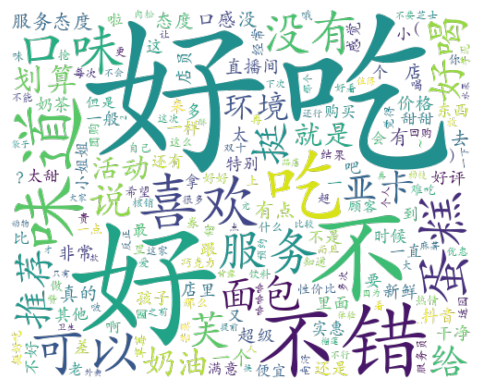

In [49]:
# 导入扩展库
import re # 正则表达式库
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库
import matplotlib.pyplot as plt
from matplotlib.font_manager import *

# 读取文件
fn = open('C:\\Users\\Administrator\\Documents\\GitHub\\daprojekt1wortwolken\\kommentierenausTiktoklive.txt') # 打开文件kommentierenausTiktoklive.txt 
string_data = fn.read() # 读出整个文件
fn.close() # 关闭文件

# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
object_list = []
remove_words = [u'的', u'，',u'和', u'是', u'随着', u'对于', u'对',u'等',u'能',u'都',u'。',u' ',u'、',u'中',u'在',u'了',
                u'通常',u'如果',u'我们',u'需要',u'很',u'就',u'还',u'！',u'：',u'这个',u'也',u'买',u'我'] # 自定义去除词库

for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表

# 词频统计
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top20 = word_counts.most_common(20) # 获取前10最高频的词
print (word_counts_top20) # 输出检查

# 词频展示
mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/STKAITI.ttf', # 设置字体格式
    width=500, height=400, mode="RGBA", background_color=None)


wc.generate_from_frequencies(word_counts) # 从字典生成词云
    #image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
    #wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc,interpolation="bilinear") # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

wc.to_file("C:/Users/Administrator/Desktop/ciyun.png")
